## Data Science Product

Credit Card Fraud Detection Model

Data Sourced from - https://www.kaggle.com/datasets/kartik2112/fraud-detection

It is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

# Phase 1 - Data Exploration & Visualisation

## Importing Libraries needed for this product

NumPy is a Python library used for scientific computing. It provides a high-performance multi-dimensional array object, and tools for working with these arrays. It is also useful for linear algebra, random number capabilities, Fourier transform, and more.

In [3]:
pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 82.8 MB/s eta 0:00:00


In [4]:
pip install jupyter_dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.2 MB/s eta 0:00:00


In [5]:
import pandas as pd
import seaborn as sns #Data visualization Library
import matplotlib.pyplot as plt
from ipywidgets import interact #Create the interactive widget
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact_manual
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import dash
from dash import dcc
from dash import html
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier


#Global variables
Gender = "Gender"
Category = "Category"
Fraud = "Fraud"
Geolocation = "Geolocation"
Fraud_Age = "Fraud_Age"

In [8]:
train_data = 'https://drive.google.com/uc?id=1_1Me4m8B5WuUr3_zCbC30epowgjIWYJy&export=download'
train_data = pd.read_csv(train_data)

#read testset
test_data = 'https://drive.google.com/uc?id=1ZqXZptoRgvbitOG6YTDsyt8idargG5aH&export=download'
test_data = pd.read_csv(test_data)


# https://drive.google.com/file/d/1ZqXZptoRgvbitOG6YTDsyt8idargG5aH/view?usp=share_link


#print the shape of the train_set data
print('Train Data Shape: ',train_data.shape[0],'rows and', train_data.shape[1], 'columns')

print()

#print the shape of the train_set data
print('Test Data Shape: ',test_data.shape[0],'rows and', test_data.shape[1], 'columns')

Train Data Shape:  50000 rows and 23 columns

Test Data Shape:  0 rows and 3 columns


In [ ]:
#select 100,000 random sample from trainset
sample_train = train_data.sample(100000, random_state = 50)

#select 50,000 random sample from testset
sample_test = test_data.sample(50000, random_state = 50)

#print top 2 records
sample_train.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
88643,88643,2019-02-22 01:14:39,342952484382519,"fraud_Heller, Gutmann and Zieme",grocery_pos,81.07,Kayla,Jones,F,6033 Young Track Suite 804,...,42.0158,-73.2913,647,Comptroller,1987-09-26,274710b082130c6fea0fd2c5581a610f,1329873279,41.452457,-72.918018,0
1238538,1238538,2020-05-31 21:28:12,30371006069917,"fraud_Koss, Hansen and Lueilwitz",home,27.73,Robert,James,M,92021 Miranda Meadows,...,38.1380,-89.2231,2135,"Development worker, community",1961-01-31,4d03613cc60858bda1a2601ede542773,1370035692,38.778411,-88.854934,0


In [ ]:
sample_test.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
266590,266590,2020-09-28 01:05:28,4800395067176717,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,6.20,Daniel,Owens,M,88794 Mandy Lodge Apt. 874,...,41.6964,-96.9858,1063,Research scientist (maths),1928-04-02,d7949ba120891cf1906170a2ac61456c,1380330328,42.416783,-96.439836,0
232959,232959,2020-09-13 12:55:26,180017442990269,fraud_Bartoletti and Sons,personal_care,19.37,Michelle,Anderson,F,28311 Dennis Trace,...,42.6853,-73.8253,151022,"Designer, textile",1939-06-01,94022e65a1334729b2789ed7dc8342f4,1379076926,41.881164,-73.041856,0


In [ ]:
#save randomized sample of trainset as an excel file(csv format)
sample_train.to_csv('sample_train.csv', index=False)

#save randomized sample of testset as an excel file(csv format)
sample_test.to_csv('sample_test.csv',  index=False)

#make all column visible
pd.set_option('display.max_columns', None)

#print top 3 observations or records
sample_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
88643,88643,2019-02-22 01:14:39,342952484382519,"fraud_Heller, Gutmann and Zieme",grocery_pos,81.07,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,CT,6024,42.0158,-73.2913,647,Comptroller,1987-09-26,274710b082130c6fea0fd2c5581a610f,1329873279,41.452457,-72.918018,0
1238538,1238538,2020-05-31 21:28:12,30371006069917,"fraud_Koss, Hansen and Lueilwitz",home,27.73,Robert,James,M,92021 Miranda Meadows,Tamaroa,IL,62888,38.1380,-89.2231,2135,"Development worker, community",1961-01-31,4d03613cc60858bda1a2601ede542773,1370035692,38.778411,-88.854934,0
18146,18146,2019-01-11 22:16:14,4681601008538160,fraud_Cartwright PLC,kids_pets,190.34,Tammy,Davis,F,77663 Colleen Freeway,Moundsville,WV,26041,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,5403fa79fbbc397db003ec4ee3f48630,1326320174,39.342257,-81.601052,0


In [ ]:
sample_train.describe()

# count - number of rows in each column
# mean - average number in each column
# min - minimum value in each column
# max - maximum value in each column
# 50% - also known as median (the middle number)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,6.502823e+05,4.177757e+17,70.386721,48752.333140,38.516398,-90.185466,8.987381e+04,1.349311e+09,38.515523,-90.185934,0.005600
std,3.743123e+05,1.310010e+18,152.902651,26857.017051,5.086150,13.715070,3.052955e+05,1.284343e+07,5.122687,13.728255,0.074624
min,4.000000e+00,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.666179,0.000000
25%,3.268738e+05,1.800429e+14,9.720000,26237.000000,34.571500,-96.790900,7.430000e+02,1.338853e+09,34.678973,-96.877719,0.000000
50%,6.510740e+05,3.521417e+15,47.605000,48174.000000,39.342600,-87.458100,2.456000e+03,1.349376e+09,39.346608,-87.394183,0.000000
75%,9.745952e+05,4.642255e+15,83.610000,72011.000000,41.940400,-80.158000,2.047800e+04,1.359529e+09,41.964990,-80.248066,0.000000
max,1.296656e+06,4.992346e+18,14112.590000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371816e+09,66.599806,-66.959178,1.000000


In [ ]:
#frequency of gender, category and geographical distribution
def update_plot(dataset):
    if dataset == Gender:
        plot_1 = sns.countplot(x="gender", data=sample_train)
        plot_1.set_title("Gender Distribution in Sample Train Dataset")
        for label in plot_1.patches:
            plot_1.annotate(str(label.get_height()), (label.get_x() + label.get_width() / 2., label.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, -50), textcoords='offset points')
    elif dataset == Category:
        plt.figure(figsize=(20, 10)) # sets the figure size to 10x6 inches
        plot_2 = sns.countplot(x="category", data=sample_train)
        plot_2.set_title("Category Distribution in Sample Train Dataset")
        for label in plot_2.patches:
            plot_2.annotate(str(label.get_height()), (label.get_x() + label.get_width() / 2., label.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 15), textcoords='offset points')
    elif dataset == Fraud:
        plot_3 = sns.countplot(x="is_fraud", data=sample_train)
        plot_3.set_title("Distribution of Fraudelent Transactions in Sample Train Dataset")
        for label in plot_3.patches:
            plot_3.annotate(str(label.get_height()), (label.get_x() + label.get_width() / 2., label.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')  
    elif dataset == Geolocation:
        plot_4 = sns.scatterplot(data = sample_train, x="lat", y="long", hue = 'is_fraud')
        plot_4.set_title("Transaction Location in Sample Train Dataset")
    elif dataset == Fraud_Age:
        plt.figure(figsize=(20, 10))
        sample_train['age']=dt.date.today().year-pd.to_datetime(sample_train['dob']).dt.year
        ax=sns.kdeplot(x='age',data=sample_train, hue='is_fraud', common_norm=False)
        ax.set_xlabel('Credit Card Holder Age')
        ax.set_ylabel('Density')
        plt.xticks(np.arange(0,110,5))
        plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
        plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
interact(update_plot, dataset=["Gender", "Category", "Fraud", "Geolocation", "Fraud_Age"])

interactive(children=(Dropdown(description='dataset', options=('Gender', 'Category', 'Fraud', 'Geolocation', '…

<function __main__.update_plot(dataset)>

## Phase 2 - Features Engineering

In [ ]:
#separate train row
sample_train_rows = sample_train.shape[0]

#separate test row
sample_test_rows = sample_test.shape[0]

#merge both train & test rows together
main_data = pd.concat((sample_train, sample_test)).reset_index(drop=True)

#all data records(both train & test)
main_data.shape

(150000, 23)

In [ ]:
#main data columns
main_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
#count the number of times each credit card was used for transaction
main_data['cc_freq'] =main_data['cc_num'].map(main_data['cc_num'].value_counts())

#convert trans_date_trans_time to datetime datatype
main_data['trans_date_trans_time'] = pd.to_datetime(main_data['trans_date_trans_time'])

#extract hour of transaction from datetime
main_data['hour_of_txn'] = main_data['trans_date_trans_time'].dt.hour

#convert dob to datetime datatype
main_data['dob'] = pd.to_datetime(main_data['dob'])

#calculate user age from date of birth column
now = pd.to_datetime('now')
main_data['age'] = now.year - main_data['dob'].dt.year

C:\Users\Max\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [ ]:
#all data columns
main_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'cc_freq', 'hour_of_txn', 'age'],
      dtype='object')

In [ ]:
#a variable name to_drop stores all columns to drop
to_drop =['Unnamed: 0','cc_num', 'first', 'last', 'gender', 'trans_date_trans_time', 'merchant', 'street', 'city','state', 'zip','city_pop',
          'job','trans_num', 'unix_time' ,'dob']

#drop all columns stored in to_drop variable
main_data =main_data.drop(to_drop, axis=1)

#check data types
main_data.dtypes

category        object
amt            float64
lat            float64
long           float64
merch_lat      float64
merch_long     float64
is_fraud         int64
cc_freq          int64
hour_of_txn      int64
age              int64
dtype: object

In [ ]:
main_data.head(5)

,category,amt,lat,long,merch_lat,merch_long,is_fraud,cc_freq,hour_of_txn,age
0,grocery_pos,81.07,42.0158,-73.2913,41.452457,-72.918018,0,374,1,36
1,home,27.73,38.1380,-89.2231,38.778411,-88.854934,0,125,21,62
2,kids_pets,190.34,39.9148,-80.7310,39.342257,-81.601052,0,303,22,46
3,kids_pets,134.74,38.8320,-77.1200,39.194023,-76.558310,0,125,14,32
4,shopping_net,7.66,39.9148,-80.7310,40.907353,-80.207589,0,303,17,46


In [ ]:
#encode categorical variable to numerical variable
main_data =pd.get_dummies(data = main_data, columns=['category'], drop_first=True)

#extract the train set record back
sample_train = main_data[:sample_train_rows]

#extract the test set record back
sample_test = main_data[sample_train_rows:]

In [ ]:
sample_train.head()

,amt,lat,long,merch_lat,merch_long,is_fraud,cc_freq,hour_of_txn,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,81.07,42.0158,-73.2913,41.452457,-72.918018,0,374,1,36,0,0,0,1,0,0,0,0,0,0,0,0,0
1,27.73,38.1380,-89.2231,38.778411,-88.854934,0,125,21,62,0,0,0,0,0,1,0,0,0,0,0,0,0
2,190.34,39.9148,-80.7310,39.342257,-81.601052,0,303,22,46,0,0,0,0,0,0,1,0,0,0,0,0,0
3,134.74,38.8320,-77.1200,39.194023,-76.558310,0,125,14,32,0,0,0,0,0,0,1,0,0,0,0,0,0
4,7.66,39.9148,-80.7310,40.907353,-80.207589,0,303,17,46,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
sample_test.head()

,amt,lat,long,merch_lat,merch_long,is_fraud,cc_freq,hour_of_txn,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
100000,6.20,41.6964,-96.9858,42.416783,-96.439836,0,195,1,95,0,0,0,0,0,0,0,0,0,0,0,1,0
100001,19.37,42.6853,-73.8253,41.881164,-73.041856,0,128,12,84,0,0,0,0,0,0,0,0,0,1,0,0,0
100002,58.70,36.1183,-79.5685,35.374583,-79.337287,0,112,3,89,0,1,0,0,0,0,0,0,0,0,0,0,0
100003,9.45,34.4596,-93.6743,33.887870,-93.040867,0,272,5,57,0,0,0,0,0,0,0,0,0,0,1,0,0
100004,1.72,41.6964,-96.9858,41.125792,-97.967163,0,195,8,95,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#store actual test result in target
target = sample_test['is_fraud']

#drop actual test result in target 
test = sample_test.drop('is_fraud', axis=1)

In [ ]:
#separate the input from the output and store in variables
input_data = sample_train.drop(['is_fraud'], axis =1)

#separate the output from the input and store as y
output_data = sample_train.is_fraud

## Phase 3.1 - Machine Learning Algorithm (Random Forest)

In [ ]:
#instantiate the model using Random Forest Classifier
random_forest = RandomForestClassifier(random_state = 20)

#machine is learning
random_forest = random_forest.fit(input_data, output_data)

#predict on test
RF_prediction = random_forest.predict(test)

In [ ]:
#create a table for predicted value & actual value
result = pd.DataFrame({'Predicted Value': RF_prediction, 'Actual Value': target})
result

,Predicted Value,Actual Value
100000,0,0
100001,0,0
100002,0,0
100003,0,0
100004,0,0
...,...,...
149995,0,0
149996,0,0
149997,0,0
149998,0,0


In [ ]:
#Metrics 1 - Accuracy
accuracy_score(target, RF_prediction)

0.99852

In [ ]:
confusion_matrix(result['Actual Value'], result['Predicted Value'])

array([[49803,     6],
       [   68,   123]], dtype=int64)

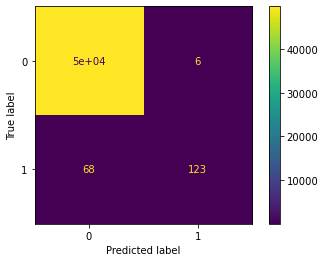

In [ ]:
ConfusionMatrixDisplay.from_predictions( result['Actual Value'], result['Predicted Value'])

The rows in the confusion matrix represents the Actual Labels 
The columns represents the predicted Labels

NB: True means the model has accurately predicted the class and False means the model has made a mistake in predicting the class.


# True Negative = 49803
A model accurately predicts the Negative class, then it is True Negative.

Here, the model predicted that 49803 transactions are Negative i.e. they are not-fraudulent and in reality these 49803 transactions are not-fraudulent. So,the prediction of Negative class is correct i.e. True Negative.


## True positive = 123
A model accurately predicts the Positive class, then it is True Positive.

Here, the model predicted that 123 transactions are Positive i.e. they are Fraudulent and in reality these transactions are Fraudulent. So, the prediction of Positive class is correct i.e. True Positive.


## False Negative = 68
A model incorrectly predicts the negative class, then it is False Negative (FN).

Here, The model predicted that 181 transactions are not-fraudulent i.e. they are not-fraudulent but in reality these transactions are Fraudulent. So, the prediction of the Negative class is incorrect i.e. False Negative.


## False Positive = 6
A model incorrectly predicts the positive class, then It is False Positive (FP).

Here,the model predicted that 6 transactions are positive i.e. They are Fraudulent But in reality these transactions are not-fraudulent. So,the prediction of the positive class is incorrect i.e. False Positive.

## Phase 3.2 - Machine Learning Algorithm (Naives Bayes)

In [ ]:
# Create a Naive Bayes classifier
Naive_Bayes = GaussianNB()

# Train the classifier
Naive_Bayes.fit(input_data, output_data)

# Make predictions
NB_prediction = Naive_Bayes.predict(test)

In [ ]:
#create a table for predicted value & actual value
result = pd.DataFrame({'Predicted Value': NB_prediction, 'Actual Value': target})
result

,Predicted Value,Actual Value
100000,0,0
100001,0,0
100002,0,0
100003,0,0
100004,0,0
...,...,...
149995,0,0
149996,0,0
149997,0,0
149998,1,0


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(target, NB_prediction)
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.919


In [ ]:
confusion_matrix(result['Actual Value'], result['Predicted Value'])

array([[45794,  4015],
       [   54,   137]], dtype=int64)

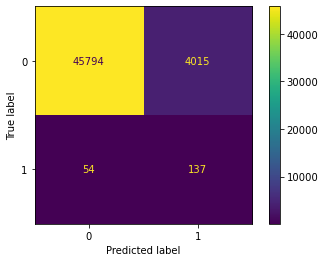

In [ ]:
ConfusionMatrixDisplay.from_predictions( result['Actual Value'], result['Predicted Value'])

The rows in the confusion matrix represents the Actual Labels The columns represents the predicted Labels

NB: True means the model has accurately predicted the class and False means the model has made a mistake in predicting the class.

## True Negative = 45794
A model accurately predicts the Negative class, then it is True Negative.

Here, the model predicted that 49803 transactions are Negative i.e. they are not-fraudulent and in reality these 49803 transactions are not-fraudulent. So,the prediction of Negative class is correct i.e. True Negative.

## True positive = 137
A model accurately predicts the Positive class, then it is True Positive.

Here, the model predicted that 123 transactions are Positive i.e. they are Fraudulent and in reality these transactions are Fraudulent. So, the prediction of Positive class is correct i.e. True Positive.

## False Negative = 54
A model incorrectly predicts the negative class, then it is False Negative (FN).

Here, The model predicted that 181 transactions are not-fraudulent i.e. they are not-fraudulent but in reality these transactions are Fraudulent. So, the prediction of the Negative class is incorrect i.e. False Negative.

## False Positive = 4015
A model incorrectly predicts the positive class, then It is False Positive (FP).

Here,the model predicted that 6 transactions are positive i.e. They are Fraudulent But in reality these transactions are not-fraudulent. So,the prediction of the positive class is incorrect i.e. False Positive.

## Phase 3.3 - Machine Learning Algorithm (Decision Tree)

In [ ]:
# Instantiate a DecisionTreeClassifier object
decision_tree = DecisionTreeClassifier()

# Fit the decision tree model to the training data
decision_tree.fit(input_data, output_data)

# Predict the labels for the test data
DT_prediction = decision_tree.predict(test)

In [ ]:
#create a table for predicted value & actual value
result = pd.DataFrame({'Predicted Value': DT_prediction, 'Actual Value': target})
result

,Predicted Value,Actual Value
100000,0,0
100001,0,0
100002,0,0
100003,0,0
100004,0,0
...,...,...
149995,0,0
149996,0,0
149997,0,0
149998,0,0


In [ ]:
# Evaluate the model
accuracy = accuracy_score(target, DT_prediction)
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.997


In [ ]:
confusion_matrix(result['Actual Value'], result['Predicted Value'])

array([[49727,    82],
       [   57,   134]], dtype=int64)

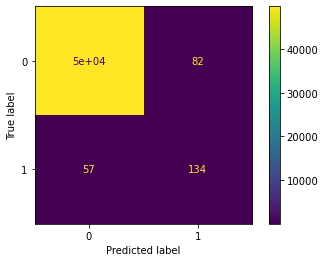

In [ ]:
ConfusionMatrixDisplay.from_predictions( result['Actual Value'], result['Predicted Value'])

## Phase 3.4 - Machine Learning Algorithm (Logistic Regression)

In [ ]:
Logistic_Regression = LogisticRegression()

# model = LogisticRegression(random_state=0)
Logistic_Regression.fit(input_data, output_data)

LR_prediction = Logistic_Regression.predict(test)

#create a table for predicted value & actual value
result = pd.DataFrame({'Predicted Value': LR_prediction, 'Actual Value': target})
result

C:\Users\Max\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predicted Value,Actual Value
100000,0,0
100001,0,0
100002,0,0
100003,0,0
100004,0,0
...,...,...
149995,0,0
149996,0,0
149997,0,0
149998,0,0


In [ ]:
# Evaluate the model
accuracy = accuracy_score(target, LR_prediction)
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.996


In [ ]:
confusion_matrix(result['Actual Value'], result['Predicted Value'])

array([[49790,    19],
       [  189,     2]], dtype=int64)

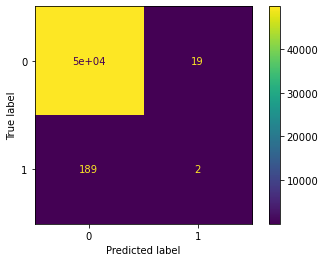

In [ ]:
ConfusionMatrixDisplay.from_predictions( result['Actual Value'], result['Predicted Value'])

## Phase 4 - Interactive Dashboard

In [ ]:
# Define the input widgets as dialog boxes
amt_widget = widgets.FloatText(value=100, description="Txn Amt:")
lat_widget = widgets.FloatText(value=40.730610, description="Lat:")
long_widget = widgets.FloatText(value=-73.935242, description="Long:")
merch_lat_widget = widgets.FloatText(value=40.730610, description="Merch Lat:")
merch_long_widget = widgets.FloatText(value=-73.935242, description="Merch Long:")
cc_freq_widget = widgets.IntText(value=5, description="Card Freq:")
hour_of_txn_widget = widgets.IntText(value=12, description="Hr of Txn:")
age_widget = widgets.IntText(value=30, description="Age:")
category_food_dining_widget = widgets.FloatText(value=0, description="Food/Dining:")
category_gas_transport_widget = widgets.FloatText(value=0, description="Gas/Transport:")
category_grocery_net_widget = widgets.FloatText(value=0, description="Grocery Net:")
category_grocery_pos_widget = widgets.FloatText(value=0, description="Grocery Pos:")
category_health_fitness_widget = widgets.FloatText(value=0, description="Health/Fitness:")
category_home_widget = widgets.FloatText(value=0, description="Home:")
category_kids_pets_widget = widgets.FloatText(value=0, description="Kids/Pets:")
category_misc_net_widget = widgets.FloatText(value=0, description="Misc Net:")
category_misc_pos_widget = widgets.FloatText(value=0, description="Misc Pos:")
category_personal_care_widget = widgets.FloatText(value=0, description="Personal Care:")
category_shopping_net_widget = widgets.FloatText(value=0, description="Shopping Net:")
category_shopping_pos_widget = widgets.FloatText(value=0, description="Shopping Pos:")
category_travel_widget = widgets.FloatText(value=0, description="Travel:")

# Define the prediction function
@interact_manual
def predict_fraud(amt=amt_widget, lat=lat_widget, long=long_widget, merch_lat=merch_lat_widget, merch_long=merch_long_widget,
                  cc_freq=cc_freq_widget, hour_of_txn=hour_of_txn_widget, age=age_widget,
                  category_food_dining=category_food_dining_widget, category_gas_transport=category_gas_transport_widget,
                  category_grocery_net=category_grocery_net_widget, category_grocery_pos=category_grocery_pos_widget,
                  category_health_fitness=category_health_fitness_widget, category_home=category_home_widget,
                  category_kids_pets=category_kids_pets_widget, category_misc_net=category_misc_net_widget,
                  category_misc_pos=category_misc_pos_widget, category_personal_care=category_personal_care_widget,
                  category_shopping_net=category_shopping_net_widget, category_shopping_pos=category_shopping_pos_widget,
                  category_travel=category_travel_widget):
    input_data = [amt, lat, long, merch_lat, merch_long, cc_freq, hour_of_txn, age, category_food_dining, category_gas_transport,
                  category_grocery_net, category_grocery_pos, category_health_fitness, category_home, category_kids_pets, category_misc_net, category_misc_pos, category_personal_care, category_shopping_net, category_shopping_pos, category_travel]
    input_data = np.array(input_data).reshape(1, -1)
    prediction = random_forest.predict(input_data)[0]  
    if prediction == 1:
        result = "Fraudulent"
    else:
        result = "Not Fraudulent"
    print("Prediction: ", result)
    
    
    
amt_widget = widgets.FloatText(value=100, description="Transaction Amount:")

# Set the width of the text label using HTML formatting
description_html = f'<div style="width: 150px">{amt_widget.description}</div>'
amt_widget.description = description_html

interactive(children=(FloatText(value=100.0, description='Txn Amt:'), FloatText(value=40.73061, description='L…

In [ ]:
# Load the dataset
# df = pd.read_csv("sample_train.csv")

df = pd.read_csv("sample_train.csv")

# Convert date_time column to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract year information from the date-time column
df['year'] = df['trans_date_trans_time'].dt.year

# Create Dash app
app = dash.Dash(__name__)

# Define the layout with a menu and date pickers
app.layout = html.Div([
    html.H1("Interactive Dashboard"),

    # Menu
    html.Div([
        html.Label("Select Chart Type:"),
        dcc.Dropdown(
            id="chart-type",
            options=[
                {"label": "Pie-chart 1", "value": "pie-chart 1"},
                {"label": "Bar Chart", "value": "bar-chart"},
                {"label": "Pie Chart 2", "value": "pie-chart 2"},
                {"label": "Scatter Plot", "value": "scatter-plot"}
            ],
            value="histogram"
        ),
    ], style={"width": "250px", "margin-bottom": "20px"}),

    # Date pickers
    html.Div([
        html.Label("Select Date Range:"),
        dcc.DatePickerRange(
            id="date-range",
            start_date=df['trans_date_trans_time'].min(),
            end_date=df['trans_date_trans_time'].max(),
            display_format='YYYY-MM-DD'
        ),
    ], style={"width": "500px", "margin-bottom": "20px"}),

    # Placeholder for chart
    html.Div(id="chart-output"),
])

# Callback for updating the chart based on selected chart type and date range
@app.callback(Output("chart-output", "children"),
              Input("chart-type", "value"),
              Input("date-range", "start_date"),
              Input("date-range", "end_date"))
def update_chart(chart_type, start_date, end_date):
    filtered_df = df[(df["trans_date_trans_time"] >= start_date) & (df["trans_date_trans_time"] <= end_date)]
    if chart_type == "pie-chart 1":
        pie_chart_data = filtered_df["category"].value_counts().reset_index()
        fig = px.pie(pie_chart_data, values="category", names="index", title="Category Distribution")
    elif chart_type == "bar-chart":
        bar_chart_data = filtered_df.groupby("category").mean().reset_index()
        fig = px.bar(bar_chart_data, x="category", y="amt", color="category")
    elif chart_type == "pie-chart 2":
        pie_chart_data = filtered_df["gender"].value_counts().reset_index()
        fig = px.pie(pie_chart_data, values="gender", names="index", title="Gender Distribution")
    elif chart_type == "scatter-plot":
        fig = px.scatter(filtered_df, x="lat", y="long", color="is_fraud", title="Scatter Plot")
    return dcc.Graph(figure=fig)

if __name__ == "__main__":
    app.run_server(debug=False)


# if __name__ == "__main__":
#     app.run_server(mode='inline', debug=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
